In [1]:
import numpy as np
from math import sin
from scipy.linalg import eigh
from numpy.linalg import inv
from matplotlib import pyplot as plt

<ipython-input-3-d0eb647b258c>:25: RuntimeWarning: invalid value encountered in sqrt
  frequencies = np.sqrt(evals) #rad/s


Frequencies in rad/s
[          nan 1816.15533548]
-o-o-o-o-o-o-
Frequencies in Hz
[         nan 289.05009906]
-o-o-o-o-o-o-
Eigenvectors
[[-10.18617294  -3.49824314]
 [-10.18617294  29.66006503]]


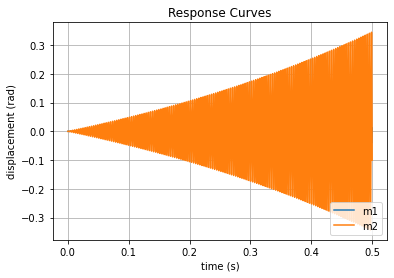

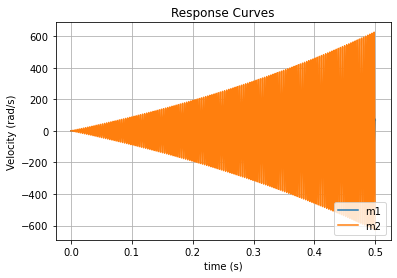

In [3]:
m = 0.008621 #kgm^2
m2 = 0.0010168
k = 3.0e3 #Nm/rad
omega = 1816.8 #rad/s
c = 0.0 #nms/rad
F0 =1.0 #N
dof = 2

K = np.array([[k,-k],[-k,k]])
C = np.array([[c,-c],[-c,c]])
M = np.array([[m, 0],[0, m2]])
I = np.identity(dof)

A = np.zeros((2*dof, 2*dof))
B = np.zeros((2*dof, 2*dof))
Y = np.zeros((2*dof, 1))
F = np.zeros((2*dof, 1))

A[dof:2*dof, dof:2*dof] = M
A[0:dof, 0:dof] = I
B[dof:2*dof, 0:dof] = K
B[0:dof, dof:2*dof] = -I
B[dof:2*dof,dof:2*dof] = C
evals, evecs = eigh(K,M)
frequencies = np.sqrt(evals) #rad/s
frequencies_hz = frequencies/(2*np.pi) #Hz
#c_crit = 2 * np.sqrt(M.dot*K.dot)

end_time = 0.5
time_step = 0.000001

A_inv = inv(A)
force = []
X1 = []
X2 = []
X3 = []
X4 = []

for t in np.arange(0, end_time, time_step):
    F[1] = F0 * sin(omega*t)
    Y_new = Y + time_step * A_inv.dot(F-B.dot(Y))
    Y = Y_new
    force.extend(F[1])
    X1.extend(Y[0])
    X2.extend(Y[1])
    X3.extend(Y[2])
    X4.extend(Y[3])
            #Y[3],[4],[5] are the displacements; [0]-[2] are velocities

time = [round(t,5) for t in np.arange(0, end_time, time_step)]
print("Frequencies in rad/s")
print(frequencies)
print("-o-o-o-o-o-o-")
print("Frequencies in Hz")
print(frequencies_hz)
print("-o-o-o-o-o-o-")
print("Eigenvectors")
print(evecs)

plt.figure(1)
plt.plot(time,X1)
plt.plot(time,X2)
plt.grid()

plt.xlabel('time (s)')
plt.ylabel('displacement (rad)')
plt.title('Response Curves')
plt.legend(['m1','m2'], loc='lower right')
plt.show()

plt.figure(2)
plt.plot(time,X3)
plt.plot(time,X4)
plt.grid()

plt.xlabel('time (s)')
plt.ylabel('Velocity (rad/s)')
plt.title('Response Curves')
plt.legend(['m1','m2'], loc='lower right')
plt.show()


In [63]:
B

array([[ 0.0e+00,  0.0e+00, -1.0e+00, -0.0e+00],
       [ 0.0e+00,  0.0e+00, -0.0e+00, -1.0e+00],
       [ 3.0e+03, -1.0e+03,  4.5e+00, -1.5e+00],
       [-1.0e+03,  1.0e+03, -1.5e+00,  1.5e+00]])

In [64]:
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 4., 0.],
       [0., 0., 0., 2.]])

In [65]:
frequencies_hz

array([2.51646061, 5.03292121])

In [87]:
frequencies

array([  0.        , 689.18430046])

In [88]:
K

array([[ 2111., -2111.],
       [-2111.,  2111.]])